In [1]:
import pandas as pd

In [6]:
# 열이 탭으로 구분되어 있다고 미리 알려주기 위해 sep 속성값으로 \t를 지정
df = pd.read_csv('data/gapminder.tsv',sep='\t')

In [9]:
print(df.head())
print(type(df))

# 행과 열의 크기에 대한 정보를 출력 (1704,6)
print(df.shape) 

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
<class 'pandas.core.frame.DataFrame'>
(1704, 6)


In [10]:
# columns 속성을 사용하면 데이터 프레임의 열 이름을 확인 할 수 있음
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [12]:
# 구성하는 값의 자료형은 데이터프레임의 dtype 속성이나 info 메서드로 확인
print(df.dtypes)
print('-'*20)
print(df.info())

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


## 데이터 추출하기

In [16]:
country_df = df['country']
print(type(country_df))
print(country_df.head())
print(country_df.tail())

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [17]:
# 여러개의 열을 한번에 추출
subset = df[['country', 'year', 'continent']]
print(type(subset))
print(subset.head())
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
       country  year continent
0  Afghanistan  1952      Asia
1  Afghanistan  1957      Asia
2  Afghanistan  1962      Asia
3  Afghanistan  1967      Asia
4  Afghanistan  1972      Asia
       country  year continent
1699  Zimbabwe  1987    Africa
1700  Zimbabwe  1992    Africa
1701  Zimbabwe  1997    Africa
1702  Zimbabwe  2002    Africa
1703  Zimbabwe  2007    Africa


In [25]:
# 행단위 데이터 추출하기
# loc : 인덱스를 기준으로 행 데이터 추출
# iloc : 행 번호를 기준으로 행 데이터 추출

print(df.loc[0])
print('-'*20)
print(df.loc[1703])
print('-'*20)
print(df.tail(n=1))

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
--------------------
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
--------------------
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [23]:
# 여러개의 데이터를 한꺼번에 추출하기
print(df.loc[[0,99,999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [27]:
# iloc로 출력
# 음수를 사용해도 데이터 추출 가능
print(df.iloc[0])
print('-' * 20)
print(df.iloc[-1])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
--------------------
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [29]:
# 슬라이싱 구문으로 데이터 추출하기
subset = df.loc[:,['year', 'pop']]
subset

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
...,...,...
1699,1987,9216418
1700,1992,10704340
1701,1997,11404948
1702,2002,11926563


In [31]:
subset = df.iloc[:,[2,4,-1]]
subset

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106
...,...,...,...
1699,1987,9216418,706.157306
1700,1992,10704340,693.420786
1701,1997,11404948,792.449960
1702,2002,11926563,672.038623


In [40]:
# range 메서드로 데이터 추출하기
small_range = list(range(5))
print(small_range)
print(type(small_range))

[0, 1, 2, 3, 4]
<class 'list'>


In [41]:
subset = df.iloc[:,small_range]
print(subset.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [43]:
# 슬라이싱 구문을 더 선호
subset = df.iloc[:,:3]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [45]:
# df.loc[출력하고자하는 행, 출력하고자하는 열]
print(df.iloc[[0,9,99],[0,3,5]])
print('-' * 30)
print(df.loc[[0,9,99],['country','lifeExp','gdpPercap']])

        country  lifeExp   gdpPercap
0   Afghanistan   28.801  779.445314
9   Afghanistan   41.763  635.341351
99   Bangladesh   43.453  721.186086
------------------------------
        country  lifeExp   gdpPercap
0   Afghanistan   28.801  779.445314
9   Afghanistan   41.763  635.341351
99   Bangladesh   43.453  721.186086


## 기초적인 통계 계산하기

In [48]:
# lifeExp 열을 연도별로 그룹화하여 평균 구하기
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [54]:
# lifeEx, gdpPercap 열의 평균값을 연도, 지역별로 그룹화하여 한번에 계산하기
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [58]:
# 그룹화한 데이터 개수 세기
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


## 그래프 그리기

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

In [60]:
global_year = df.groupby('year')['lifeExp'].mean()
print(global_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


<AxesSubplot:xlabel='year'>

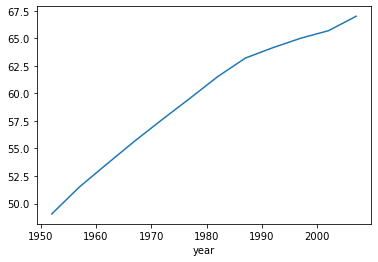

In [61]:
global_year.plot()

In [62]:
global_country = df.groupby('continent')['country'].nunique()
print(global_country)

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


<AxesSubplot:xlabel='continent'>

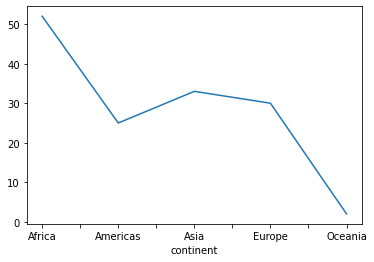

In [63]:
global_country.plot()